# Lab 02 Report

## Introduction

This lab is an introductory look into biometric data collection and statistical analysis. Through this lab, first and foremost, it is important to understand how to, specifically, collect data through physical signatures created by people and convert it into useable data. By collecting signatures using specific software, it is possible to obtain data on the signatures such as the x and y coordinates, the pressure, and time values. Through using this data, it is then possible to statistically analyze and present such data in various different ways. It is therefore important to be able to understand this process as this will then be used in the future to plot impostor and genuine distributions that can be also be used in various ways to extract information.

### Exercise 1

The two plots below are of histograms. Both of the histograms use mean = 50 and standard deviation = 5, however the first histogram generates 80 samples and plots 10 bins while the second histogram generates 1000 samples and plots 100 bins. 

The second histogram is created with a considerably greater amount of samples taken into consideration. As can be seen by the graphs and the printed mean and standard deviation, when we run both codes multiple times, the mean and standard deviation of the histogram with 1000 samples seems to more accurately reflect the theoretical mean and standard deviation that are mentioned in the lab handout (which are 50 and 5 respectively). Overall, the histogram with 80 samples produces means and standard deviations that are more different than the theoretical mean and standard deviation than the histogram with 1000 samples which produces means and standard deviations which are closer to the theoretical values. On the other hand, increasing the number of bins considered helps to display a more detailed histogram. The histogram with 1000 samples and 100 bins provides significantly more detail as to what values are in the samples while the histogram with 80 samples and 10 bins provides little information comparatively. At the same time, the smaller amount of bins does not particularly help to explain why there might be more of a difference between the calculated mean and standard deviation and the theoretical values (it isn't immediately apparent why the histogram with 80 samples and 10 bins has calcualted values more off the theoretical values than the histogram with 1000 samples and 100 bins).

How to use norm.rvs and plt.hist was taken from the Lab02_2023W handout on D2L.

REAL mean: 49.51; std: 4.81


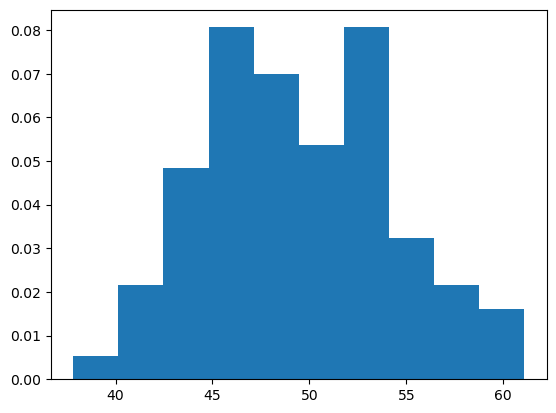

In [44]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Theoretical Mean and Std
mu = 50
std = 5

# 80 samples of random variables
samples = 80

# Generate random variables with a loc of mu and a scale of std
pop_norm = norm.rvs(mu, std, size = samples)

# Plot the histogram with 10 bins
plt.hist(pop_norm, bins = 10, density = True)

# Plot the actual mean and standard deviation of the random variables
print ("REAL mean: %.2f; std: %.2f" % (np.mean(pop_norm), np.std(pop_norm)))

REAL mean: 50.06; std: 4.99


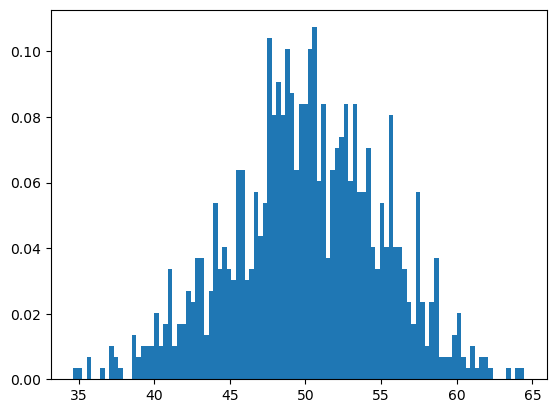

In [38]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Theoretical Mean and Std
mu = 50
std = 5

# Generate 1000 samples of random variables
samples = 1000

# Generate random variables with a loc of mu and a scale of std
pop_norm = norm.rvs(mu , std , size = samples)

# Plot the histogram with 100 bins
plt.hist(pop_norm, bins = 100, density = True)

# Print the actual mean and standard deviation of the random variables
print ("REAL mean: %.2f; std: %.2f" % (np.mean(pop_norm), np.std(pop_norm)))

### Exercise 2

The following plot is a Normal distribution of the pressures of the signature in the file 1.csv in the Impostor subdirectory of the Biometrics folder. The Normal Distribution was created using norm.pdf which was also used in Lab 1 and the mean and standard deviation were obtained through the np.mean and np.std functions respectively.

The output of the code below is a mean, std, and a blue lined plot of the Normal distribution of the pressures of an impostor signature (where the impostor wrote the word "biometrics"). The mean of the pressures was calculated to be 0.63 while the standard deviation of the pressures was calculated to be 0.10. As can be seen in the plot of the Normal distribution, the Normal distribution is centered around the pressure value of 0.6. This plot shows that the impostor signature contained in the file 1.csv has the highest chance of having a pressure between the range of 0.5-0.7. 

How to read csv files and obtain data from them was taken from the Lab02_2023W handout on D2L.

Mean: 0.63; std: 0.10


Text(0, 0.5, 'pdf(Pressure)')

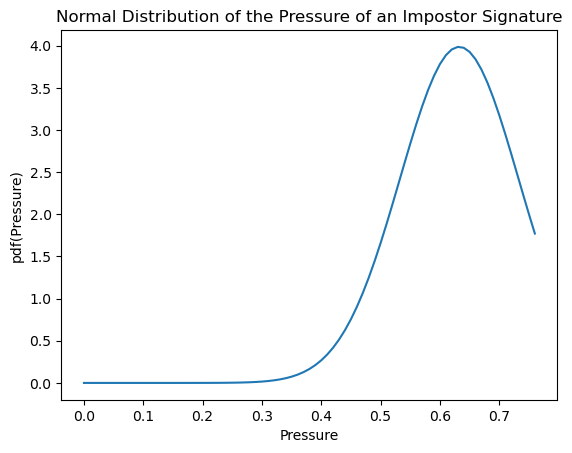

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Sub directory of signature_samples
subdir = "impostor/"
# Inside of biometrics in directory signature_samples/biometrics/impostor/
data_dir = "signature_samples/biometrics/" + subdir
# Read the file 1.csv
csv_file = pd.read_csv(data_dir + '1.csv')

# Show the first lines of the data loaded
# The file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()

# Splitting the original data/ matrix into 3 variables
coord1 = csv_file [['X', 'Y']].to_numpy ()
time1 = csv_file ['Time'].to_numpy().reshape((-1, 1))
prs1 = csv_file ['Pressure'].to_numpy().reshape((-1, 1))

# Calculate the mean of the pressures
mean = np.mean(prs1)

# Calculate the standard deviation of the pressures
std = np.std(prs1)

# Print the mean and standard deviation of the pressures
print ("Mean: %.2f; std: %.2f" % (mean, std))

# Create a range starting from the minimum pressure of the signature to the maximum pressure of the signature
prs1 = np.arange(min(prs1), max(prs1), 0.01)

# Plot the Normal distribution (which is created using norm.pdf)
plt.plot(prs1, norm.pdf(prs1, mean, std))

# Title the graph
plt.title('Normal Distribution of the Pressure of an Impostor Signature')

# Title the x axis
plt.xlabel('Pressure')

# Title the y axis
plt.ylabel('pdf(Pressure)')

# Exercise 3

The following graph is a 3d graph of the signature from the file 1.csv in the impostor subdirectory of the Biometrics folder. The X and Y axis represent the X and Y coordinates of the signature respectively while the Z axis represents the pressure at an X and Y coordinate of the signature. 

This code was taken from the Lab02_2023W handout on D2L.

1. Explain why do we have the line if time_diff != 0:? 
    1. The signature csv files contain the information recorded on a person writing a signature over time. However, it is possible to have multiple records of data with the same recorded time. In that case, the time difference in between the current point of data and the next point of data can be 0 (as both of the records contain the same time point and therefore $time\_diff = time[i+1] - time[i] = x - x = 0$). This becomes a problem when obtaining/calculating velocity because the formula for velocity is $vel = \frac{distance}{time\_diff}$. If time_diff is 0, then the program tries to divide by 0 which is undefined. Therefore, it is important to stop the program from doing so by first checking if time_diff is 0 and only allowing it to divide if time_diff is not 0. 

As said before, this is a 3d plot of a signature's data (specifically the signature of an impostor who wrote "biometrics"). The plot below displays the pressure at an X and Y coordinate of the impostor's signature. As shown in the graph, the vast majority of the signature is drawn at a high pressure, with certain parts (mainly at the end of the signature) being drawn at a lower pressure. 

Text(0.5, 0.92, 'Pen pressure in 3D')

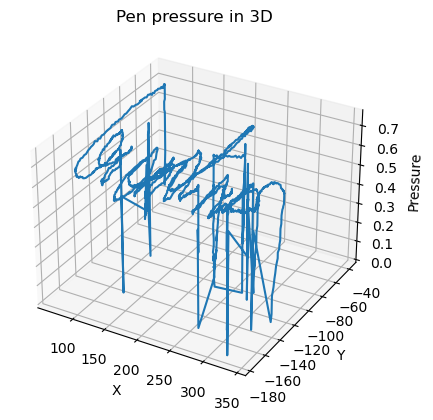

In [11]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Sub directory of signature_samples
subdir = "impostor/"
# Inside of biometrics in directory signature_samples/biometrics/impostor/
data_dir = "signature_samples/biometrics/" + subdir
# Read the file 1.csv
csv_file = pd.read_csv(data_dir + '1.csv')

# Show the first lines of the data loaded
# The file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()

# Splitting the original data/ matrix into 3 variables
coord1 = csv_file [['X', 'Y']].to_numpy ()
time1 = csv_file ['Time'].to_numpy().reshape((-1, 1))
prs1 = csv_file ['Pressure'].to_numpy().reshape((-1, 1))

# Below is the code to calculate velocity and plot velocity map of one signature: Explain why do
# we have the line if time_diff == 0:?
vel = np.zeros((len(time1) - 1, 1))

for i in range (len(time1) - 1):
    distance = np.sqrt((coord1[i+1, 0] - coord1[i ,0])**2 + (coord1[i+1, 1] - coord1[i, 1])**2)
    # if too fast , time diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1
    
vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)


ax = plt.axes(projection = '3d')
# the line below is to reshape to vector using . flatten method
ax.plot3D(coord1[: ,0].flatten(), -coord1[:, 1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D')

### Exercise 4

The following two graphs are the graphs of the Normal Distribution of Average Pressure and the Normal Distribution of Average Velocity of 30 Genuine signatures found in the signature_samples/biometrics/genuine directory. 

This code was taken from the Lab02_2023W handout on D2L. 

#### Exercise 4.a

The following graph is a graph of the Normal distribution of the Average Pressure of 30 Genuine signatures of the word "biometrics". To obtain the pressures across 30 Genuine signatures, each csv file in the "genuine" subdirectory of "biometrics" folder was read from. From each csv files, the X and Y coordinates, the time, and pressure were extracted and put into temporary arrays. As we are trying to display the Normal distribution of the Average Pressure of 30 Genuine signatures, once the pressures from one csv file were extracted, we used np.mean to obtain the overall Average Pressure of the one signature and then stored it inside of an array for later use. This was then performed 30 times to obtain 30 Average Pressures of the individual that wrote those signatures. Then, the average of the Average Pressures was obtained using np.mean and the standard deviation was obtained by using np.mean on the 30 standard deviations. Lastly, we could then plot the Normal Distribution of the Average Pressure of 30 Genuine signatures using this information. 

When the code is ran, a graph of the Normal distribution plotted against Average Pressure of the 30 Genuine signatures is created. As can be seen, the Average Pressure across the 30 Genuine samples seems to overwhelmingly be in the range of 0.21-0.25. This means that the individual that wrote the 30 Genuine "biometrics" signatures seems to, on average, write with a pressure in the range of 0.21-0.25. 

Text(0, 0.5, 'pdf(Average Pressure)')

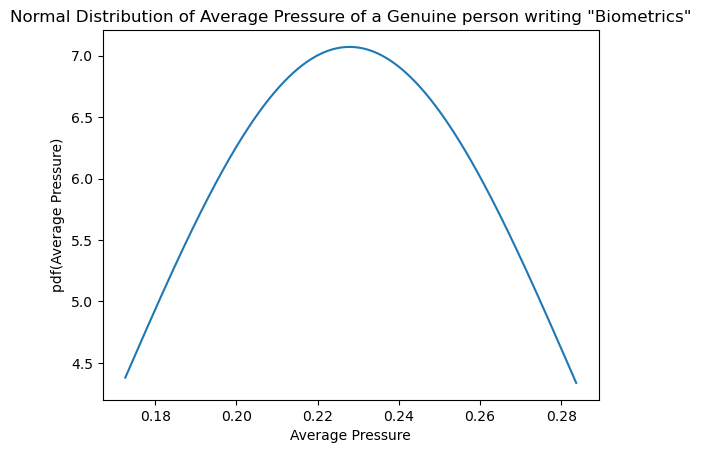

In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Sub directory of signature_samples
subdir = "genuine/"
# Inside of biometrics in directory signature_samples/biometrics/genuine/
data_dir = "signature_samples/biometrics/" + subdir

# Vectors for holding the pressure mean and pressure standard devication of each signature
pres_mean = np.zeros(30)
pres_std = np.zeros(30)

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    
    # Store pressure mean and pressure standard devication of each signature
    pres_mean[i] = np.mean(prs1)
    pres_std[i] = np.std(prs1)

# Get the mean of the mean pressure array
mean = np.mean(pres_mean)

# Get the standard deviation of the standard deviation pressure array
std = np.mean(pres_std)

# Create a range starting from the minimum pressure of the signature to the maximum pressure of the signature
pres_mean = np.arange(min(pres_mean), max(pres_mean), 0.0001)

# Plot the Normal distribution (which is created using norm.pdf)
plt.plot(pres_mean, norm.pdf(pres_mean, mean, std))

# Title the graph
plt.title('Normal Distribution of Average Pressure of a Genuine person writing "Biometrics"')

# Title the x axis
plt.xlabel('Average Pressure')

# Title the y axis
plt.ylabel('pdf(Average Pressure)')

#### Exercise 4.b

The following graph is a graph of the Normal distribution of the Average Velocity of 30 Genuine signatures of the word "biometrics". To obtain the velocity across 30 Genuine signatures, each csv file in the "genuine" subdirectory of "biometrics" folder was read from. From each csv files, the X and Y coordinates, the time, and pressure were extracted and put into temporary arrays. As we are trying to display the Normal distribution of the Average Velocity of 30 Genuine signatures, once the X and Y coordinates and Time from one csv file were extracted, we first calculated the velocities of a signature using the calc_velocity function (taken from Lab02_2023W on D2L). Once we had an array of velocities for one signature (given by the calc_velocity function) we could then find their mean and standard deviation using np.mean and np.std respectively. This was then performed 30 times to obtain 30 Average Velocities of the individual that wrote those signatures. Then, the average of the Average Velocities was obtained using np.mean and the standard deviation was obtained by using np.mean on the 30 standard deviations. Lastly, we could then plot the Normal Distribution of the Average Velocity of 30 Genuine signatures using this information. 

When the code is ran, a graph of the Normal distribution plotted against Average Velocity of the 30 Genuine signatures is created. As can be seen, the Average Velocity across the 30 Genuine samples seems to be somewhat spread across the range of 12.5-18. This means that the individual that wrote the 30 Genuine "biometrics" signatures seems to, on average, write with a velocity in the range of 12.5-18.

Text(0, 0.5, 'pdf(Average Velocity)')

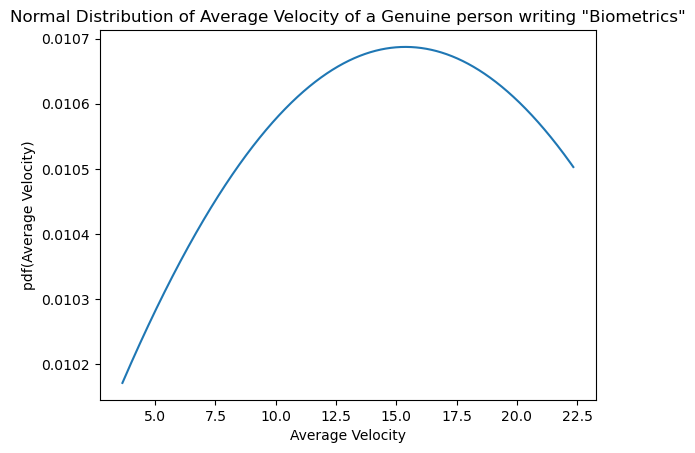

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Function calc_velocity to calculatre the velocities of a signature
def calc_velocity(time, coords):
    vel = np.zeros((len(time) - 1, 1))
    
    for i in range (len(time) - 1):
        distance = np.sqrt((coords[i + 1 ,0] - coords[i, 0])**2 + (coords[i + 1, 1] - coords [i, 1])**2)
        
        # if too fast time diff = 0
        time_diff = time[i + 1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001
            
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
        
    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

# Sub directory of signature_samples
subdir = "genuine/"
# Inside of biometrics in directory signature_samples/biometrics/genuine/
data_dir = "signature_samples/biometrics/" + subdir

# Vectors for holding the velocity mean and velocity standard deviation of each signature
vel_mean = np.zeros(30)
vel_std = np.zeros(30)

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    
    vel = calc_velocity(time1, coord1)
    
    # Store velocity mean and velocity standard deviation of each signature
    vel_mean[i] = np.mean(vel)
    vel_std[i] = np.std(vel)

# Get the mean of the mean velocity array
mean = np.mean(vel_mean)

# Get the standard deviation of the standard deviation velocity array
std = np.mean(vel_std)

# Create a range starting from the minimum pressure of the signature to the maximum pressure of the signature
vel_mean = np.arange(min(vel_mean), max(vel_mean), 0.01)

# Plot the Normal distribution (which is created using norm.pdf)
plt.plot(vel_mean, norm.pdf(vel_mean, mean, std))

# Title the graph
plt.title('Normal Distribution of Average Velocity of a Genuine person writing "Biometrics"')

# Title the x axis
plt.xlabel('Average Velocity')

# Title the y axis
plt.ylabel('pdf(Average Velocity)')

### Exercise 5

The following two graphs are the graphs of the Normal Distribution of Average Pressure and the Normal Distribution of Average Velocity of 30 Impostor signatures found in the signature_samples/biometrics/impostor directory. 
 
The distributions from Exercise 4 and Exercise 5 are quite different in some ways:
1. The individual that wrote the Genuine signature seems to write with a pressure that is more likely to be in the range of 0.21-0.25 while the individual that wrote the Impostor signature seems to write with a pressure that is more likely to be in the range of 0.525-0.600. This means that the individual that wrote the Impostor signature is more likely to write with a higher pressure than the individual that wrote the Genuine signature.
2. On the other hand, the individual that wrote the Genuine signature seems to write with a velocity that is more likely to be in the range of 12.5-18 while the individual that wrote the Impostor signature seems to write with a velocity that is more likely to be in the range of 11-15. This means that the individual that wrote the Impostor signature is more likely to write with a lower velocity (slower) than the individual that wrote the Genuine signature. 

Overall, the individual that wrote the Genuine signature seems to write faster and gentler when compared to the individual that wrote the Impostor signature who seems to write slower and harder. 

This code was taken from the Lab02_2023W handout on D2L. 

#### Exercise 5.a

The following graph is a graph of the Normal distribution of the Average Pressure of 30 Impostor signatures of the word "biometrics". To obtain the pressures across 30 Impostor signatures, each csv file in the "impostor" subdirectory of "biometrics" folder was read from. From each csv files, the X and Y coordinates, the time, and pressure were extracted and put into temporary arrays. As we are trying to display the Normal distribution of the Average Pressure of 30 Impostor signatures, once the pressures from one csv file were extracted, we used np.mean to obtain the overall Average Pressure of the one signature and then stored it inside of an array for later use. This was then performed 30 times to obtain 30 Average Pressures of the individual that wrote those signatures. Then, the average of the Average Pressures was obtained using np.mean and the standard deviation was obtained by using np.mean on the 30 standard deviations. Lastly, we could then plot the Normal Distribution of the Average Pressure of 30 Impostor signatures using this information. 

When the code is ran, a graph of the Normal distribution plotted against Average Pressure of the 30 Impostor signatures is created. As can be seen, the Average Pressure across the 30 Impostor samples seems to overwhelmingly be in the range of 0.525-0.600. This means that the individual that wrote the 30 Impostor "biometrics" signatures seems to, on average, write with a pressure in the range of 0.525-0.600. 

Text(0, 0.5, 'pdf(Average Pressure)')

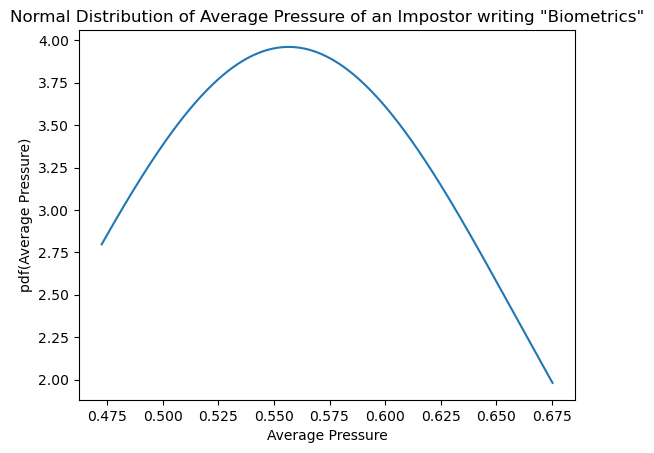

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Function calc_velocity to calculatre the velocities of a signature
def calc_velocity(time, coords):
    vel = np.zeros((len(time) - 1, 1))
    
    for i in range (len(time) - 1):
        distance = np.sqrt((coords[i + 1 ,0] - coords[i, 0])**2 + (coords[i + 1, 1] - coords [i, 1])**2)
        
        # if too fast time diff = 0
        time_diff = time[i + 1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001
            
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
        
    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

# Sub directory of signature_samples
subdir = "impostor/"
# Inside of biometrics in directory signature_samples/biometrics/genuine/
data_dir = "signature_samples/biometrics/" + subdir

# Vectors for holding the pressure mean and pressure standard devication of each signature
pres_mean = np.zeros(30)
pres_std = np.zeros(30)

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    
    vel = calc_velocity(time1, coord1)
    
    # Store pressure mean and pressure standard deviation of each signature
    pres_mean[i] = np.mean(prs1)
    pres_std[i] = np.std(prs1)

# Get the mean of the mean pressure array
mean = np.mean(pres_mean)

# Get the standard deviation of the standard deviation pressure array
std = np.mean(pres_std)

# Create a range starting from the minimum pressure of the signature to the maximum pressure of the signature
pres_mean = np.arange(min(pres_mean), max(pres_mean), 0.0001)

# Plot the Normal distribution (which is created using norm.pdf)
plt.plot(pres_mean, norm.pdf(pres_mean, mean, std))

# Title the graph
plt.title('Normal Distribution of Average Pressure of an Impostor writing "Biometrics"')

# Title the x axis
plt.xlabel('Average Pressure')

# Title the y axis
plt.ylabel('pdf(Average Pressure)')

#### Exercise5.b

The following graph is a graph of the Normal distribution of the Average Velocity of 30 Impostor signatures of the word "biometrics". To obtain the velocity across 30 Impostor signatures, each csv file in the "impostor" subdirectory of "biometrics" folder was read from. From each csv files, the X and Y coordinates, the time, and pressure were extracted and put into temporary arrays. As we are trying to display the Normal distribution of the Average Velocity of 30 Impostor signatures, once the X and Y coordinates and Time from one csv file were extracted, we first calculated the velocities of a signature using the calc_velocity function (taken from Lab02_2023W on D2L). Once we had an array of velocities for one signature (given by the calc_velocity function) we could then find their mean and standard deviation using np.mean and np.std respectively. This was then performed 30 times to obtain 30 Average Velocities of the individual that wrote those signatures. Then, the average of the Average Velocities was obtained using np.mean and the standard deviation was obtained by using np.mean on the 30 standard deviations. Lastly, we could then plot the Normal Distribution of the Average Velocity of 30 Impostor signatures using this information. 

When the code is ran, a graph of the Normal distribution plotted against Average Velocity of the 30 Impostor signatures is created. As can be seen, the Average Velocity across the 30 Impostor samples seems to be somewhat spread across the range of 11-15. This means that the individual that wrote the 30 Impostor "biometrics" signatures seems to, on average, write with a velocity in the range of 11-15.

Text(0, 0.5, 'pdf(Average Velocity)')

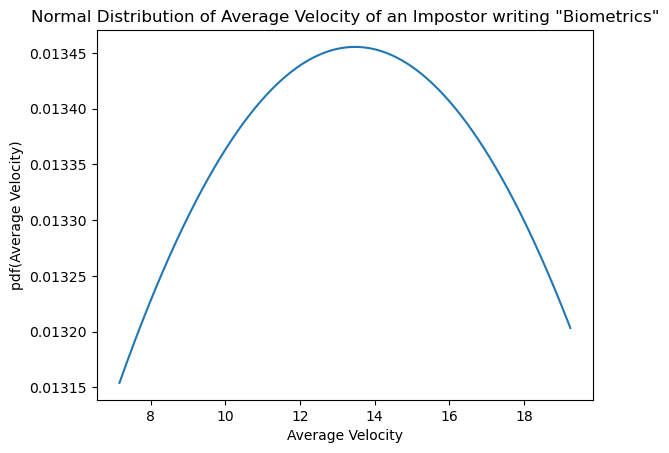

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# Function calc_velocity to calculatre the velocities of a signature
def calc_velocity(time, coords):
    vel = np.zeros((len(time) - 1, 1))
    
    for i in range (len(time) - 1):
        distance = np.sqrt((coords[i + 1 ,0] - coords[i, 0])**2 + (coords[i + 1, 1] - coords [i, 1])**2)
        
        # if too fast time diff = 0
        time_diff = time[i + 1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001
            
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
        
    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

# Sub directory of signature_samples
subdir = "impostor/"
# Inside of biometrics in directory signature_samples/biometrics/genuine/
data_dir = "signature_samples/biometrics/" + subdir

# Vectors for holding the velocity mean and velocity standard deviation of each signature
vel_mean = np.zeros(30)
vel_std = np.zeros(30)

for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    
    vel = calc_velocity(time1, coord1)
    
    # Store velocity mean and velocity standard deviation of each signature
    vel_mean[i] = np.mean(vel)
    vel_std[i] = np.std(vel)

# Get the mean of the mean velocity array
mean = np.mean(vel_mean)

# Get the standard deviation of the standard deviation velocity array
std = np.mean(vel_std)

# Create a range starting from the minimum pressure of the signature to the maximum pressure of the signature
vel_mean = np.arange(min(vel_mean), max(vel_mean), 0.01)

# Plot the Normal distribution (which is created using norm.pdf)
plt.plot(vel_mean, norm.pdf(vel_mean, mean, std))

# Title the graph
plt.title('Normal Distribution of Average Velocity of an Impostor writing "Biometrics"')

# Title the x axis
plt.xlabel('Average Velocity')

# Title the y axis
plt.ylabel('pdf(Average Velocity)')

## Conclusion

In conclusion, this lab was an overview into plotting and interpreting biometric data collected through specialized hardware and software used to collect information on an individual's signature. Through this lab, we were able to understand the process of accumulating and collecting biometric signature data and plotting it using Python libraries. At the same time, we were able to learn about the unconscious differences created between an individual writing a Genuine signature and an Impostor writing an Impostor signature. These differences manifest in the form of vastly varying pressure and velocity between Genuine and Impostor signatures. The main take-out from this lab was the creation of these differences and how we can plot, display, and interpret the differences that are created between Genuine and Impostor signatures. It is important to learn these lessons as they will be built upon and used in the future to further analyze and present biometric statistics.